# Tensorflow

### Defination of Tensorflow

TensorFlow is an open source software library for numerical computation using dataflow graphs. Nodes in the graph represents mathematical operations, while graph edges represent multi-dimensional data arrays (aka tensors) communicated between them. The flexible architecture allows you to deploy computation to one or more CPUs or GPUs in a desktop, server, or mobile device with a single API.”

Look at TensorFlow as nothing but numpy with a twist. If you have worked on numpy before, understanding TensorFlow will be a piece of cake! A major difference between numpy and TensorFlow is that TensorFlow follows a lazy programming paradigm. It first builds a graph of all the operation to be done, and then when a “session” is called, it “runs” the graph. It’s built to be scalable, by changing internal data representation to tensors (aka multi-dimensional arrays). Building a computational graph can be considered as the main ingredient of TensorFlow.
 
 For more details visit "https://www.analyticsvidhya.com/blog/2016/10/an-introduction-to-implementing-neural-networks-using-tensorflow/"

### Few terminologies used in TensoFlow;

placeholder: A way to feed data into the graphs

feed_dict: A dictionary to pass numeric values to computational graph

#### small program to add two numbers! using Tensorflow

In [1]:
#import Tensorflow
import tensorflow as tf

In [5]:
# build computational graph

a = tf.placeholder(tf.int64)
b = tf.placeholder(tf.int64)

In [6]:
#addition
addition = tf.add(a,b)
#subtraction
subtract = tf.subtract(a,b)

In [15]:
#initializing the variables

initial = tf.global_variables_initializer()

In [21]:
# create session and run the graph

with tf.Session() as sess:
    sess.run(initial)
    summation =sess.run(addition,feed_dict={a:3,b:2})
    difference = sess.run(subtract,feed_dict={a:3,b:2})
    print("addition =" ,summation )
    print("subtraction =",difference)
    
#close session
sess.close()

addition = 5
subtraction = 1


## Implementing Neural Network in TensorFlow

In [3]:
#importing all the required libraries
%pylab inline
import os
import numpy as np
import pandas as pd
import scipy 
from scipy.misc import imread
from sklearn.metrics import confusion_matrix
import tensorflow as tf


Populating the interactive namespace from numpy and matplotlib


E:\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#setting the seed
rng = np.random.RandomState(seed=123)

In [6]:
#reading the data files

train = pd.read_csv("E:\\INSOFE\\AI and Deep Learning\\tensorflow\\Train_HI6auGp\\Train\\train.csv")
test = pd.read_csv("E:\\INSOFE\\AI and Deep Learning\\tensorflow\\Test.csv")

In [7]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [13]:
#to check what our data looks like! We read our image and display it.

img_name = rng.choice(train.filename)

img = imread(os.path.join("E:\\INSOFE\\AI and Deep Learning\\tensorflow\\Train_HI6auGp\\Train\\Images\\train",img_name),flatten=True)

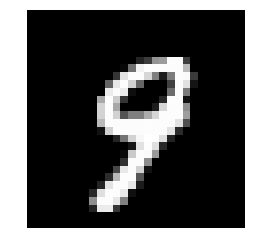

In [14]:
pylab.imshow(img,cmap = 'gray')
pylab.axis('off')
pylab.show()

In [15]:
img

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.

#### For easier data manipulation, let’s store all our images as numpy arrays

In [17]:
#train
temp =[]
for img_name in train.filename:
    img = imread(os.path.join("E:\\INSOFE\\AI and Deep Learning\\tensorflow\\Train_HI6auGp\\Train\\Images\\train",img_name),flatten=True)
    img = img.astype('float32')
    temp.append(img)
train_x = np.stack(temp)

In [18]:
#test
temp=[]
for img_name in test.filename:
    img = imread(os.path.join("E:\\INSOFE\\AI and Deep Learning\\tensorflow\\Train_HI6auGp\\Train\\Images\\test",img_name),flatten=True)
    img = img.astype('float32')
    temp.append(img)

test_x = np.stack(temp)

In [24]:
#Train and Validation split

#from sklearn.model_selection import train_test_split

#x_train,x_val,y_train,y_val = train_test_split(train_x,train.label.values,test_size = 0.3,random_state=103)

In [30]:
#x_train.shape,val_x.shape

((34300, 28, 28), (14700, 28, 28))

In [27]:
#another kind of test and train split

split_size = int(train_x.shape[0]*0.7)

train_x,val_x = train_x[:split_size],train_x[split_size:]
train_y,val_y = train.label.values[:split_size],train.label.values[split_size:]

In [35]:
train_x.shape,val_x.shape,train_y.shape,val_y.shape

((34300, 28, 28), (14700, 28, 28), (34300,), (14700,))

In [36]:
def dense_to_one_hot(labels_dense, num_classes=10):
    """Convert class labels from scalars to one-hot vectors"""
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    
    return labels_one_hot